# Resampling Datetime Data (Core)


*Christina Brockway*

Use weather data from London from Kaggle:  https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data

A modified version for this project:  https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing


## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as msno

import seaborn as sns
import numpy as np

import datetime as dt



In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

## Load Data

In [3]:

df=pd.read_csv('data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Convert to datetime dtype

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

### Set date column as index

In [5]:
df= df.set_index('date')
df.head(1)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0


### Filter out dates from 2000 on and keep only:
-  precipitation
-  mean temp
-  max temp
-  min temp
-  snow depth

In [19]:
dff = df.loc['2000':, ['precipitation', 'mean_temp', 'max_temp', 'min_temp', 'snow_depth']]
dff.head()

,precipitation,mean_temp,max_temp,min_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,10.8,4.9,0.0
2000-01-02,0.2,7.9,11.5,5.0,0.0
2000-01-03,6.0,9.4,9.5,7.2,0.0
2000-01-04,0.2,7.0,11.0,4.4,0.0
2000-01-05,0.8,6.4,10.8,1.9,0.0


### Impute missing values

In [7]:
dff.isna().sum()

precipitation     390
mean_temp         419
max_temp          390
min_temp          386
snow_depth       1752
dtype: int64

In [8]:
# Impute temps with interpolate()
dff['min_temp'] = dff['min_temp'].interpolate()
dff['max_temp'] = dff['max_temp'].interpolate()
dff['mean_temp'] = dff['mean_temp'].interpolate()

In [9]:
## fill in precipitation and snow as 0 since there are times with no precipitation
dff['snow_depth'] = dff['snow_depth'].fillna(0)
dff['precipitation'] = dff['precipitation'].fillna(0)

In [10]:
dff.isna().sum()

precipitation    0
mean_temp        0
max_temp         0
min_temp         0
snow_depth       0
dtype: int64

In [11]:
temp= dff.copy()

# Q1 What month had the most precipitation between 2000 through 2010?

In [12]:
#Resample to a monthly frequency
tempR = temp.asfreq("M")
tempR

,precipitation,mean_temp,max_temp,min_temp,snow_depth
date,,,,,
2000-01-31,0.0,11.5,10.7,10.3,0.0
2000-02-29,5.6,7.8,9.3,5.5,0.0
2000-03-31,0.0,7.5,11.8,5.0,0.0
2000-04-30,0.0,11.6,16.6,6.5,0.0
2000-05-31,1.4,12.6,16.8,6.3,0.0
...,...,...,...,...,...
2020-08-31,0.0,13.3,18.5,8.1,0.0
2020-09-30,3.0,14.1,18.1,10.2,0.0
2020-10-31,7.0,14.5,15.6,13.5,0.0


In [25]:
## Resample using .sum()
temp1=temp.resample("MS").sum()
temp1.head()

,precipitation,mean_temp,max_temp,min_temp,snow_depth
date,,,,,
2000-01-01,14.3,174.05,262.95,82.10,0.0
2000-02-01,62.2,208.25,298.50,113.20,0.0
2000-03-01,13.4,263.25,377.45,151.65,0.0
2000-04-01,71.8,269.90,394.85,158.25,0.0
2000-05-01,68.4,427.75,556.30,295.40,0.0


In [26]:
max_prep = temp1['precipitation'].idxmax()
locmonths = mdates.MonthLocator(interval=3)
locyear = mdates.YearLocator(1)
fmtyear = mdates.DateFormatter("%Y")
titlep=  'Precipitation for 2000-2010'
ylabel = 'Inches'

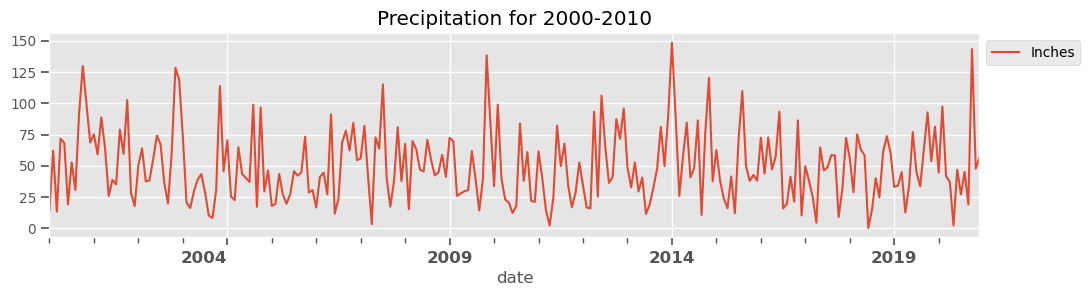

In [28]:
fig, ax = plt.subplots(figsize=(12,3))

#Set ticklabel format
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 'large', fontweight= 'bold')

#Set major ticks
ax.xaxis.set_major_locator(locyear)
ax.xaxis.set_major_formatter(fmtyear)

#Set minor ticks
ax.xaxis.set_minor_locator(locmonths)

fig.autofmt_xdate(which='major', rotation=90)
temp1['precipitation'].plot(ax=ax, title=titlep, label=ylabel)
ax.legend(bbox_to_anchor=[1,1]);ax.legend(bbox_to_anchor=[1,1])
plt.show();

# Q2 Which year between 2000-2020 had the coolest average temperature?

In [29]:
## Resample using .sum()
temp2=temp.resample("Y").mean()
temp2.head()

,precipitation,mean_temp,max_temp,min_temp,snow_depth
date,,,,,
2000-12-31,1.974863,11.575683,15.144672,8.001503,0.008197
2001-12-31,1.850411,11.331507,15.036575,7.647397,0.000000
2002-12-31,2.060000,12.084247,15.815205,8.425890,0.000000
2003-12-31,1.261096,12.114521,16.360274,7.895890,0.024658
2004-12-31,1.622131,11.900683,15.549044,8.234563,0.005464


In [32]:
low_temp= temp2['min_temp'].idxmax()
locmonths = mdates.MonthLocator(interval=1)
locyear = mdates.YearLocator(5)
fmtyear = mdates.DateFormatter("%Y")
titlet=  'Average Temperature'
ylabel='Degrees'

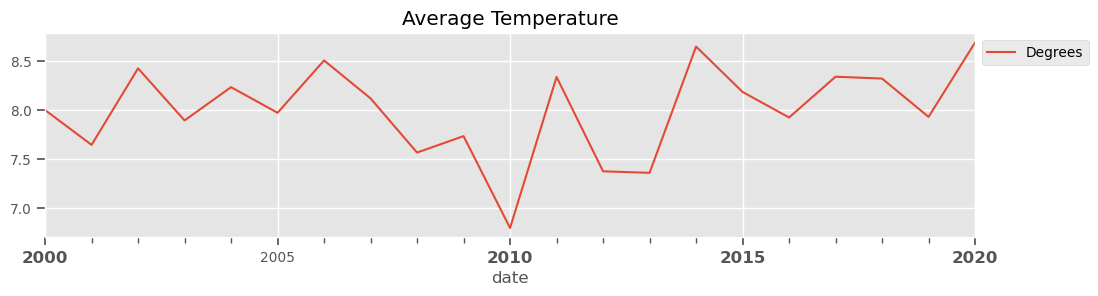

In [35]:
fig, ax = plt.subplots(figsize = (12,3))

ax.set()

#Set major ticks
ax.xaxis.set_major_locator(locyear)
ax.xaxis.set_major_formatter(fmtyear)

#Set minor ticks
ax.xaxis.set_minor_locator(locmonths)

#Set ticklabel format
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 'large', fontweight= 'bold')


fig = ax.get_figure()
fig.autofmt_xdate(rotation=90, ha= 'center')

temp2['min_temp'].plot(ax=ax, title=titlet, label= ylabel)

ax.legend(bbox_to_anchor=[1,1]);ax.legend(bbox_to_anchor=[1,1])
plt.show();